# **Exploratory Data Analysis - Retail**
## Import all required libraries

## Data Collection

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [192]:
df = pd.read_csv('/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data exploration

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [194]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [195]:
df.shape

(9994, 13)

In [196]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Another way of finding null values:)

In [197]:
[var for var in df.columns if df[var].isnull().sum()>0]

[]

The above output says that the given dataset has no null values

In [198]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [199]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [200]:
df.duplicated().sum()

17

In [230]:
# remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(9977, 14)

In [202]:
# find all unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Remove unnecessary data variable

In [203]:
df.drop('Country',axis=1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [204]:
df.drop('Postal Code',axis=1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [208]:
category = df["Category"].value_counts()
category.index

Index(['Office Supplies', 'Furniture', 'Technology'], dtype='object')

In [209]:
category.values

array([6012, 2118, 1847])

In [210]:
category.sort_values

<bound method Series.sort_values of Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64>

### Pie chart of categories that are shipped


([<matplotlib.patches.Wedge at 0x7fd644caf8b0>,
 [Text(-0.3484064762155767, 1.0433661520918938, 'Office Supplies'),
  Text(-0.2820512427913923, -1.063224856951638, 'Furniture'),
  Text(0.9191494357368781, -0.6042882712618032, 'Technology')],
 [Text(-0.1900398961175873, 0.569108810231942, '60.26%'),
  Text(-0.1538461324316685, -0.5799408310645298, '21.23%'),
  Text(0.5013542376746608, -0.32961178432461985, '18.51%')])

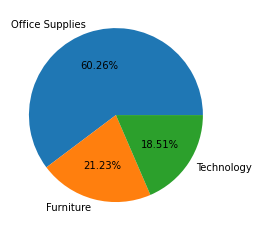

In [211]:
plt.pie(category.values,labels=category.index, autopct='%1.2f%%')

### Pie chart of Segment

In [212]:
Segment = df.Segment.value_counts()
Segment_name = Segment.index
Segment_val = Segment.values
Segment

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

([<matplotlib.patches.Wedge at 0x7fd644b315b0>,
 [Text(-1.1877688954051295, -0.07283578178394673, 'Consumer'),
  Text(1.0273695438604642, -0.5598319572406902, 'Corporate'),
  Text(0.6057240158236431, 0.9657631265763252, 'Home Office')],
 [Text(-0.6887063343105373, -0.04223251212682625, '51.9%'),
  Text(0.5883227302448811, -0.32058753106945503, '30.2%'),
  Text(0.3400555878308172, 0.5421828079024983, '17.8%')])

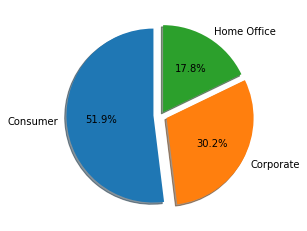

In [213]:
explode = [0.09,0.07,0.04]
plt.pie(Segment_val,labels=Segment_name,autopct='%1.1f%%',explode=explode,shadow=True,startangle=90)

Profit Margins

In [215]:
df['ProfitMargins%'] = (df['Profit']/df['Sales'])*100
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,ProfitMargins%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.25


In [216]:
categorical_analysis = pd.DataFrame(df.groupby(['Category'])[['Sales','Profit','Quantity']].sum())
categorical_analysis

,Sales,Profit,Quantity
Category,,,
Furniture,741306.3133,18421.8137,8020
Office Supplies,718735.2440,122364.6608,22861
Technology,836154.0330,145454.9481,6939


In [217]:
Loss_statewise = df[df['ProfitMargins%']<0].groupby(['State']).size().sort_values(ascending = False).reset_index().rename(columns={0:"Loss"}).head(10)
Loss_statewise

,State,Loss
0,Texas,486
1,Pennsylvania,278
2,Illinois,254
3,Ohio,208
4,Florida,126
5,California,105
6,Arizona,85
7,North Carolina,68
8,Colorado,66
9,Tennessee,65


# Some visualizations of given data

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

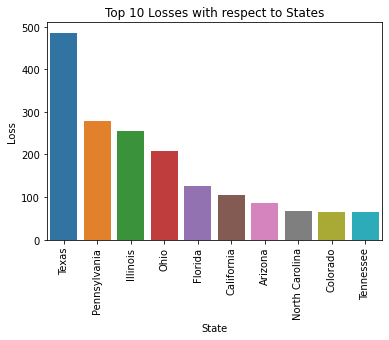

In [237]:
sns.barplot(x="State",y="Loss",data=Loss_statewise)
plt.title("Top 10 Losses with respect to States")
plt.xticks(rotation=90)

In [238]:
loss_wrt_city = df[df['Profit']<0].City.value_counts().head(10)
loss_wrt_city

Philadelphia     250
Houston          185
Chicago          154
Dallas            73
Columbus          50
New York City     40
Jacksonville      40
Los Angeles       37
Aurora            35
San Antonio       33
Name: City, dtype: int64

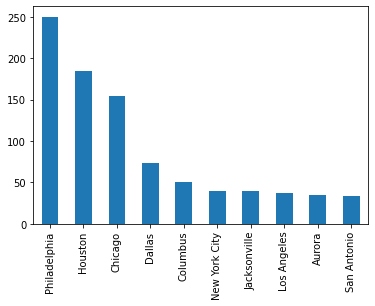

In [239]:
loss_wrt_city.plot(kind='bar')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Ship Mode')

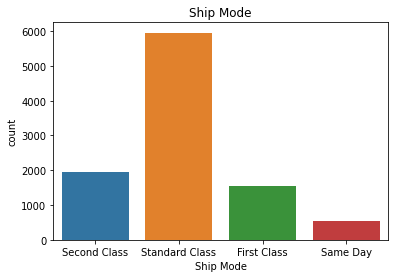

In [240]:
sns.countplot(df['Ship Mode'])
plt.title('Ship Mode')

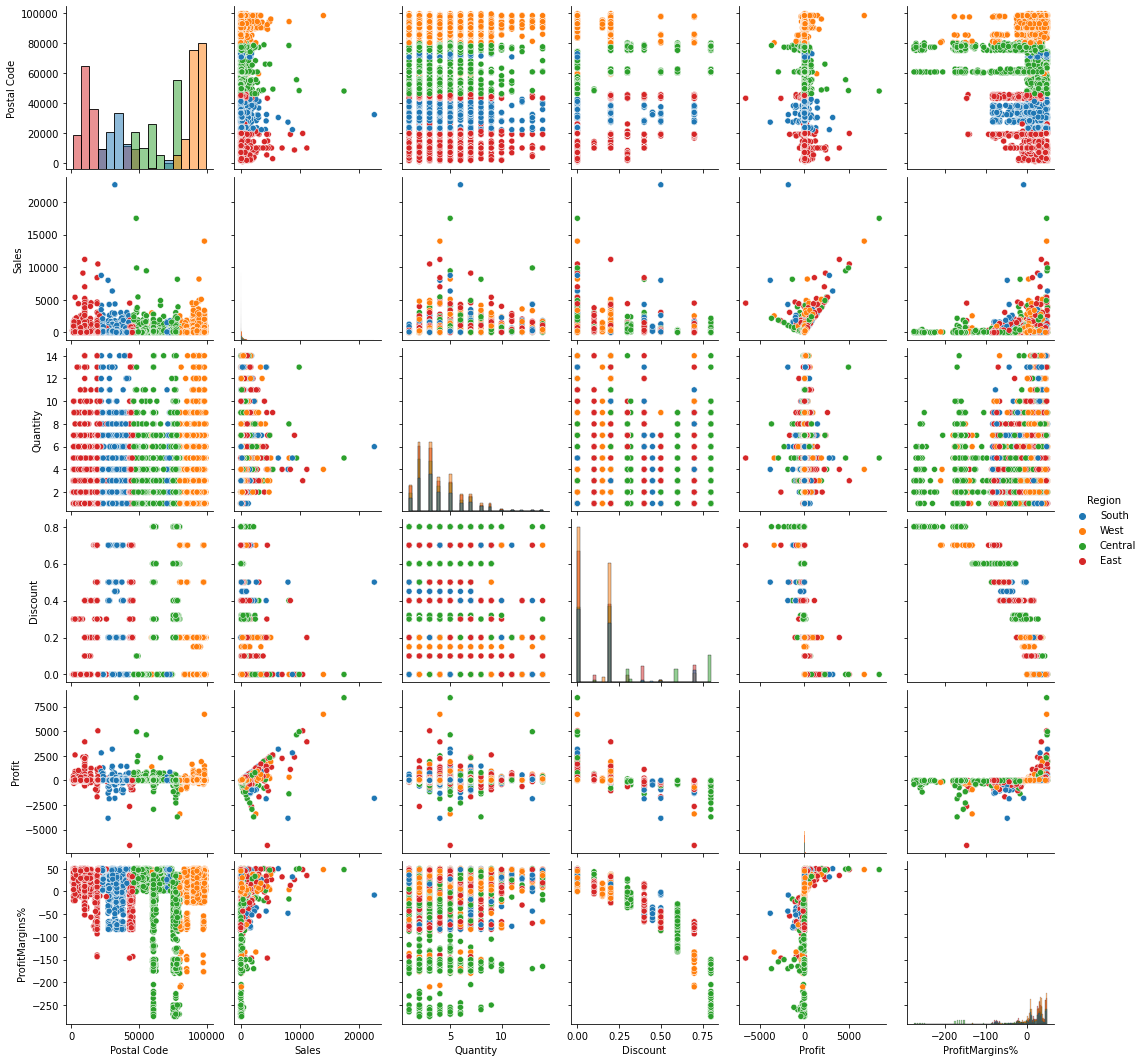

In [222]:
sns.pairplot(df,hue="Region",diag_kind='hist')

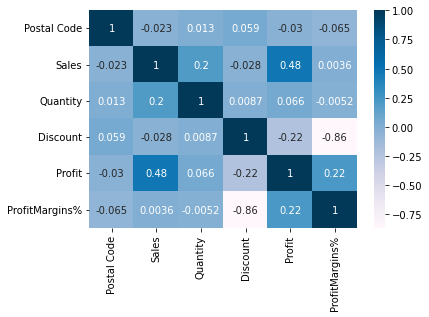

In [241]:
sns.heatmap(df.corr(),cmap='PuBu',annot=True)

Text(0.5, 1.0, 'Sales And Profit')

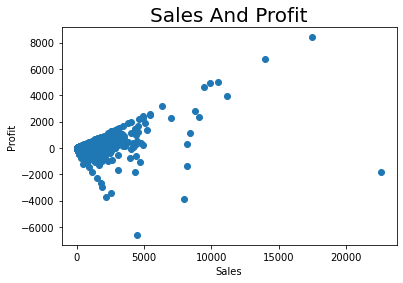

In [243]:
plt.scatter('Sales','Profit',data=df)
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title("Sales And Profit",fontsize=20)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

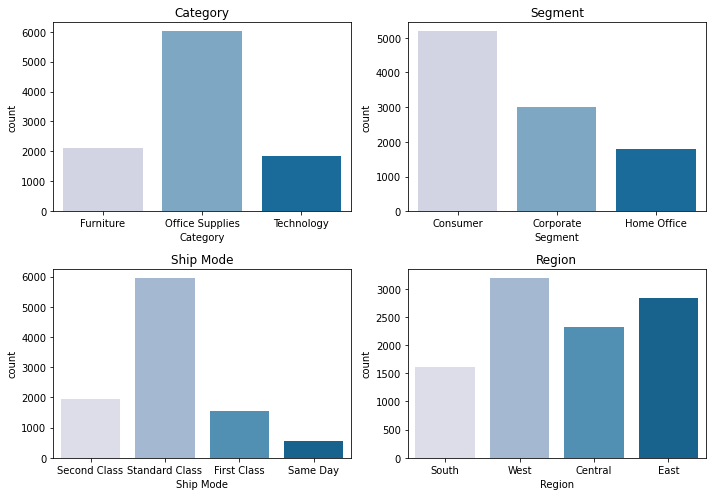

In [229]:
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=(10,7));
sns.countplot(df["Category"],ax=ax[0][0],palette='PuBu')
sns.countplot(df["Segment"],ax=ax[0][1],palette='PuBu')
sns.countplot(df["Ship Mode"],ax=ax[1][0],palette='PuBu')
sns.countplot(df["Region"],ax=ax[1][1],palette='PuBu')
ax[0][0].set_title("Category")
ax[0][1].set_title("Segment")
ax[1][0].set_title("Ship Mode")
ax[1][1].set_title("Region")
plt.tight_layout()